
Привет, меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на красные комментарии ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>







<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за очень качественную работу - видно, что вложено много труда.
- Я оставил некоторые советы, надеюсь они будут полезными и интересными
- Есть некоторые недочеты, которые нужно поправить, но у тебя это не должно занять много времени)
- Жду обновленную работу


# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

**Цель проекта:**

*Постройте модель, которая умеет её определять. В вашем распоряжении данные о технических характеристиках, комплектации и ценах других автомобилей.*


**Задачи исследования:**
1. Загрузите и подготовьте данные.
2. Изучите данные. Заполните пропущенные значения и обработайте аномалии в столбцах. Если среди признаков имеются неинформативные, удалите их
3. Подготовьте выборки для обучения моделей.
4. Обучите разные модели, одна из которых — LightGBM, как минимум одна — не бустинг. Для каждой модели попробуйте разные гиперпараметры.
5. Проанализируйте время обучения, время предсказания и качество моделей.
6. Опираясь на критерии заказчика, выберете лучшую модель, проверьте её качество на тестовой выборке.


**Исходные данные:**
1. Признаки
- `DateCrawled` — дата скачивания анкеты из базы
- `VehicleType` — тип автомобильного кузова
- `RegistrationYear` — год регистрации автомобиля
- `Gearbox` — тип коробки передач
- `Power` — мощность (л. с.)
- `Model` — модель автомобиля
- `Kilometer` — пробег (км)
- `RegistrationMonth` — месяц регистрации автомобиля
- `FuelType` — тип топлива
- `Brand` — марка автомобиля
- `Repaired` — была машина в ремонте или нет
- `DateCreated` — дата создания анкеты
- `NumberOfPictures` — количество фотографий автомобиля
- `PostalCode` — почтовый индекс владельца анкеты (пользователя)
- `LastSeen` — дата последней активности пользователя

2. Целевой признак
- `Price` — цена (евро)

**Примечания:**
- Для оценки качества моделей применяйте метрику RMSE.
- Значение метрики RMSE должно быть меньше 2500.
- Самостоятельно освойте библиотеку LightGBM и её средствами постройте модели градиентного бустинга.
- Время выполнения ячейки кода Jupyter Notebook можно получить специальной командой. Найдите её.
- Модель градиентного бустинга может долго обучаться, поэтому измените у неё только два-три параметра.
- Если перестанет работать Jupyter Notebook, удалите лишние переменные оператором del.



In [1]:
!pip install catboost

In [2]:
!pip install phik

     |████████████████████████████████| 686 kB 1.2 MB/s eta 0:00:01


In [3]:
import pandas as pd
import numpy as np
import re
import time

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression
)

from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)

from sklearn.preprocessing import (
    StandardScaler,
    OrdinalEncoder,
)

from sklearn.tree import DecisionTreeRegressor

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from sklearn.metrics import (
    roc_auc_score,
    r2_score,
    accuracy_score,
    mean_squared_error,
)

import phik

<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты  на месте
</div>


In [4]:
path_autos_dataset = '/datasets/autos.csv'
path_autos_loc = 'autos.csv'

try:
    autos_data = pd.read_csv(path_autos_dataset)

except:
    autos_data = pd.read_csv(path_autos_loc)


## Подготовка данных

In [5]:
autos_data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


- Имена таблиц необходимо преобразовать к "змеинному стилю"

In [6]:
autos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [7]:
autos_data.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [8]:
autos_data.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'Repaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

In [9]:
# переведем имена столбцов к змеинному стилю
new_columns = []
for column in autos_data.columns:
    new_columns.append(re.sub(r'(?<!^)(?=[A-Z])', '_', column).lower())
autos_data.columns = new_columns

autos_data.head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


- преобразуем необходимые типы данных

In [10]:
# приведем столбцы с датой в формат datetime64
autos_data['date_crawled'] = pd.to_datetime(autos_data['date_crawled'], format='%Y-%m-%d %H:%M:%S')
autos_data['date_created'] = pd.to_datetime(autos_data['date_created'], format='%Y-%m-%d %H:%M:%S')
autos_data['last_seen'] = pd.to_datetime(autos_data['last_seen'], format='%Y-%m-%d %H:%M:%S')

# изменим типы даныых в registration_year и registration_month с float на int
autos_data['registration_year'] = autos_data['registration_year'].fillna(0.0).astype('int64', errors='ignore')
autos_data['registration_month'] = autos_data['registration_month'].fillna(0.0).astype('int64', errors='ignore')

In [11]:
autos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        354369 non-null  datetime64[ns]
 1   price               354369 non-null  int64         
 2   vehicle_type        316879 non-null  object        
 3   registration_year   354369 non-null  int64         
 4   gearbox             334536 non-null  object        
 5   power               354369 non-null  int64         
 6   model               334664 non-null  object        
 7   kilometer           354369 non-null  int64         
 8   registration_month  354369 non-null  int64         
 9   fuel_type           321474 non-null  object        
 10  brand               354369 non-null  object        
 11  repaired            283215 non-null  object        
 12  date_created        354369 non-null  datetime64[ns]
 13  number_of_pictures  354369 no

In [12]:
# проверка на наличие дубликатов
autos_data.duplicated().sum()

4

In [13]:
# избавляемся от дублткатов
autos_data = autos_data.drop_duplicates().reset_index(drop=True)

In [14]:
autos_data.duplicated().sum()

0

In [15]:
"""
посмотрим на неявные дубликаты:
 price,
 brand,
 model,
 registration_year,
 fuel_type,
 gearbox,
 postal_code

"""
autos_data[autos_data.duplicated(subset=('price',
                                         'brand',
                                         'model',
                                         'registration_year',
                                         'fuel_type',
                                         'gearbox',
                                         'postal_code'),
                                 keep=False)].sort_values(by=['brand','postal_code']).head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
262827,2016-04-04 13:50:46,1500,sedan,2002,manual,120,147,150000,9,petrol,alfa_romeo,no,2016-04-04,0,1109,2016-04-06 15:16:30
306269,2016-03-28 13:49:54,1500,sedan,2002,manual,120,147,150000,9,petrol,alfa_romeo,no,2016-03-28,0,1109,2016-04-06 17:45:48
41823,2016-04-04 11:57:20,3250,convertible,1997,manual,150,spider,150000,7,petrol,alfa_romeo,no,2016-04-04,0,4600,2016-04-06 13:44:33
109339,2016-04-04 10:53:17,3250,convertible,1997,manual,150,spider,150000,3,petrol,alfa_romeo,no,2016-04-04,0,4600,2016-04-06 12:17:39
86114,2016-03-29 00:41:26,1200,wagon,2003,manual,166,156,150000,5,petrol,alfa_romeo,no,2016-03-28,0,6110,2016-04-07 07:16:47


Встречаются записи об одних и тех же машинах, но удалять их не будем чтобы не упустить данные в дальнейшем анализе.

**Подробно изучим пропуски:**


пропуски у 5 признаков (категориальные) на которые стоит обратить внимание:
- vehicle_type (37490)
- gearbox (19833)
- model (19705)
- fuel_type (32895)
- repaired (71154)

**vehicle_type**

In [16]:
print('Доля пропусков в столбце vehicle_type составляет {:.1%}'
      .format(len(autos_data[autos_data['vehicle_type'].isnull() == True]) / autos_data.shape[0]))

Доля пропусков в столбце vehicle_type составляет 10.6%


In [17]:
autos_data['vehicle_type'].value_counts()

sedan          91457
small          79830
wagon          65165
bus            28775
convertible    20203
coupe          16161
suv            11996
other           3288
Name: vehicle_type, dtype: int64

Признаки имеют значение `other`, пропуски можно заменить на него.

In [18]:
autos_data['vehicle_type'].fillna('other', inplace=True)
autos_data['vehicle_type'].isna().sum()

0

**gearbox**

In [19]:
print('Доля пропусков в столбце gearbox составляет {:.1%}'
      .format(len(autos_data[autos_data['gearbox'].isnull() == True]) / autos_data.shape[0]))

Доля пропусков в столбце gearbox составляет 5.6%


In [20]:
autos_data['gearbox'].value_counts()

manual    268249
auto       66283
Name: gearbox, dtype: int64

Мы точно не можем сказать, к какой категории относятся пропуски. Поставим заглушку `unknown`.

In [21]:
autos_data['gearbox'].fillna('unknown', inplace=True)
autos_data['gearbox'].isna().sum()

0

**model**

In [22]:
print('Доля пропусков в столбце model составляет {:.1%}'
      .format(len(autos_data[autos_data['model'].isnull() == True]) / autos_data.shape[0]))

Доля пропусков в столбце model составляет 5.6%


In [23]:
autos_data['model'].value_counts().head()

golf     29232
other    24420
3er      19761
polo     13066
corsa    12570
Name: model, dtype: int64

Признаки имеют значение `other`, пропуски можно заменить на него.

In [24]:
autos_data['model'].fillna('other', inplace=True)
autos_data['model'].isna().sum()

0

**fuel_type**

In [25]:
print('Доля пропусков в столбце fuel_type составляет {:.1%}'
      .format(len(autos_data[autos_data['fuel_type'].isnull() == True]) / autos_data.shape[0]))

Доля пропусков в столбце fuel_type составляет 9.3%


In [26]:
autos_data['fuel_type'].value_counts()

petrol      216349
gasoline     98719
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: fuel_type, dtype: int64

In [27]:
autos_data['fuel_type'].fillna('other', inplace=True)
autos_data['fuel_type'].isna().sum()

0

**repaired**

In [28]:
print('Доля пропусков в столбце repaired составляет {:.1%}'
      .format(len(autos_data[autos_data['repaired'].isnull() == True]) / autos_data.shape[0]))

Доля пропусков в столбце repaired составляет 20.1%


In [29]:
autos_data['repaired'].value_counts()

no     247158
yes     36053
Name: repaired, dtype: int64

Мы точно не можем сказать, к какой категории относятся пропуски. Поставим заглушку `unknown`.

In [30]:
autos_data['repaired'].fillna('unknown', inplace=True)
autos_data['repaired'].isna().sum()

0

In [31]:
#  проверим данные на пропуски еще раз
autos_data.isna().sum()

date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
kilometer             0
registration_month    0
fuel_type             0
brand                 0
repaired              0
date_created          0
number_of_pictures    0
postal_code           0
last_seen             0
dtype: int64


<div class="alert alert-block alert-success">
<b>Успех:</b>  Пропуски обработаны хорошим образом
</div>


<div class="alert alert-block alert-info">
<b>Совет:</b> У fuel_type есть категории, которые означают одно и тоже - их можно объединить, либо подумать может они действительно означают, что-то разное.
</div>


In [32]:
autos_data.head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,480,other,1993,manual,0,golf,150000,0,petrol,volkswagen,unknown,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,other,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21


**Избавимся от неинформативных признаков**

In [33]:
new_autos_data = autos_data.drop(['date_crawled',
                                  'registration_month',
                                  'date_created',
                                  'number_of_pictures',
                                  'postal_code',
                                  'last_seen'], axis=1)



<div class="alert alert-block alert-success">
<b>Успех:</b> Удалить неинформативные признаки - верное решение
</div>

In [34]:
new_autos_data.head()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,480,other,1993,manual,0,golf,150000,petrol,volkswagen,unknown
1,18300,coupe,2011,manual,190,other,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,unknown
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


In [35]:
new_autos_data.isna().sum()

price                0
vehicle_type         0
registration_year    0
gearbox              0
power                0
model                0
kilometer            0
fuel_type            0
brand                0
repaired             0
dtype: int64

**Вывод:**

- данные загрузились корректно
- названия таблиц преобразованы в "змеинный стиль"
- обнаруженны пропуски:

    -  `vehicle_type`: 37490
        - признаки имеют значение `other`, можем заменить на него;

    -  `gearbox`: 19833
        - точно нельзя сказать к какой категории относятся пропуски, так что поставим заглушку `unknown`

    -  `model`: 19705
        - признаки имеют значение `other`, можем заменить на него;

    - `fuel_type`: 32895
       - признаки имеют значение `other`, можем заменить на него;

    - `repaired`: 71154
       - точно нельзя сказать к какой категории относятся пропуски, так что поставим заглушку `unknown`


- преобразовали типы данных:
   - `date_crawled` в datetime
   - `date_created` в datetime
   - `last_seen` в datetime
   - `registration_year`  в int
   - `registration_month` в int

- Избавились от 4 явных дубликатов
- неявные дубликаты встречаются, но избавляться от них не стоит, чтобы не упустить необходимые данные в дальнейшем анализе.

- избавились от неинформативных признаков, которые не повлияют на обучение модели для определения стоимости автомобиля:
     - `date_crawled`
     - `registration_month`
     - `date_created`
     - `number_of_pictures`
     - `postal_code`
     - `last_seen`


## Иследовательский анализ

In [36]:
def creator_histogram_and_boxplot(df, column_name):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.title(f'Распределение для "{column_name}"')
    plt.xlabel(f'Значение "{column_name}"')
    plt.ylabel('Плотность распределения')
    plt.grid()
    sns.histplot(data=df, x=column_name, kde=True ,palette='BuPu', stat='density', common_norm=False)


    plt.subplot(1, 2, 2)
    plt.title(f'Диаграмма размаха "{column_name}"')
    plt.ylabel('Плотность распределения')
    plt.grid()
    sns.boxplot(y=column_name, hue=False, data=df, palette='BuPu')

    
def creator_pie(df, column_name, name, n, i):
    plt.subplot(1, n, i)
    plt.title(column_name)
    plt.pie(
        x=df.groupby(column_name)[name].count(),
        startangle=90,
        labeldistance=1.1,
        wedgeprops={'linewidth':3, 'edgecolor':'white'},
        autopct='%1.1f%%',
        labels=df.groupby(column_name)[name].count().index,
        colors=sns.color_palette('BuPu_r')
    )
    

In [37]:
def categories_of_characteristics(df):
    num_col = []
    cat_col = []

    for column in df.columns:
        if column != 'id':
            if df[column].dtype == 'object':
                cat_col.append(column)
            else:
                num_col.append(column)
    print('Количественные:', num_col)
    print('Категориальные:', cat_col)


In [38]:
categories_of_characteristics(new_autos_data)

Количественные: ['price', 'registration_year', 'power', 'kilometer']
Категориальные: ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'repaired']


**Количественные признаки**

**`price` - целевой признак**

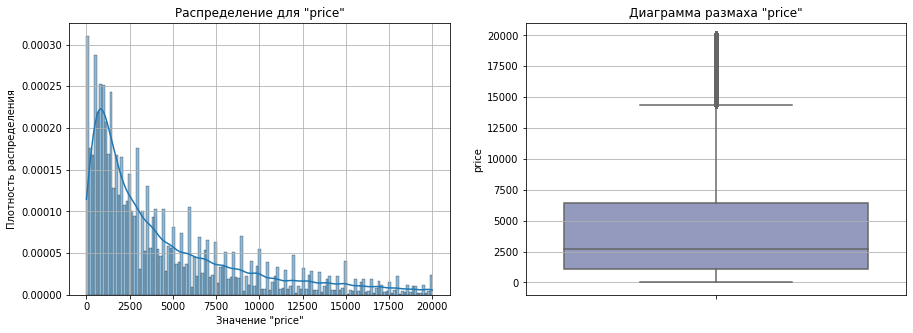

In [39]:
creator_histogram_and_boxplot(new_autos_data, 'price')

In [40]:
new_autos_data['price'].describe()

count    354365.000000
mean       4416.679830
std        4514.176349
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: price, dtype: float64

Имеет ненормальное, смещенное влево распределение, так как дорогих машин явно меньше, чем машин подешевле, потому дорогие машины показываются как выбросы на диаграмме размаха. Машина за 0 евро вызывает подозрения, данное значение рассмотрим отдельно. Однако стоит убрать записи с нулевой ценой, поскольку они не представляют интереса в построении модели для предсказания цены - будут только "сбивать" её.

In [41]:
new_autos_data.loc[new_autos_data['price'] != 0]['price'].count()

343593

In [42]:
new_autos_data['price'].quantile([0.05, 0.95])

0.05      200.0
0.95    14600.0
Name: price, dtype: float64

In [43]:
new_autos_data[new_autos_data['price'] < 200].shape[0] / new_autos_data.shape[0]

0.04927687553793405

In [44]:
new_autos_data = new_autos_data[new_autos_data['price'] >= 200]

<div class="alert alert-block alert-success">
<b>Успех:</b>  Самое интересное, что на нескольких сайтов по продажам подержанных автомобилей в Германии (страну можно определить по почтовым индексам, большинство из них из Германии) показало, что цены начинаются действительно с 0 и 1 евро, но это единичные объявления и не понятно, то ли это ошибка при заполнении формы, то ли машины на металлолом. Но я  все-таки склоняюсь к тому, чтобы избавиться от таких данных
</div>

In [45]:
new_autos_data['price'].describe()

count    336903.000000
mean       4643.642063
std        4515.355328
min         200.000000
25%        1250.000000
50%        2950.000000
75%        6650.000000
max       20000.000000
Name: price, dtype: float64

**registration_year**

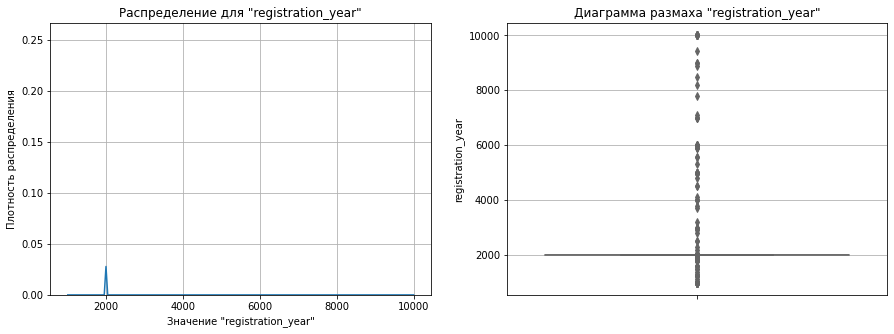

In [46]:
creator_histogram_and_boxplot(new_autos_data, 'registration_year')

In [47]:
new_autos_data['registration_year'].describe()

count    336903.000000
mean       2003.979979
std          67.939004
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

Имеет явные аномальные значения в виде 1000 года и 9999 года. min - 1000, median - 2003, max 9999. Обработаем аномалии и построим новое распределение.

In [48]:
new_autos_data['registration_year'].quantile([0.05, 0.95])

0.05    1993.0
0.95    2016.0
Name: registration_year, dtype: float64

In [49]:
new_autos_data = new_autos_data.query('1993 <= registration_year <= 2016')


<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, согласно дате выгрузки базы, у нас не может быть год регистрации больше 2016 года 
</div>

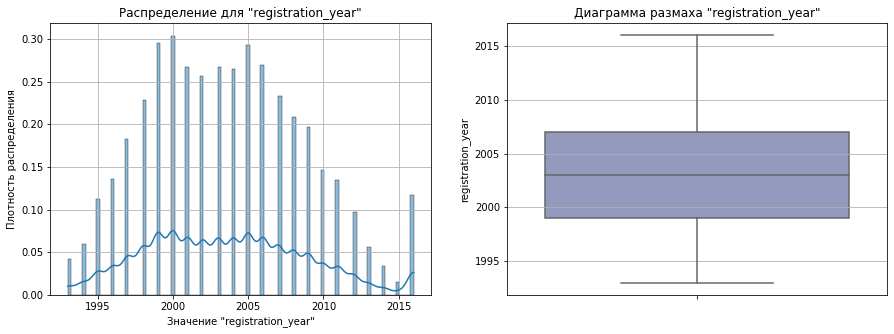

In [50]:
creator_histogram_and_boxplot(new_autos_data, 'registration_year')

In [51]:
new_autos_data['registration_year'].describe()

count    307105.000000
mean       2003.594311
std           5.284284
min        1993.000000
25%        1999.000000
50%        2003.000000
75%        2007.000000
max        2016.000000
Name: registration_year, dtype: float64

**power**

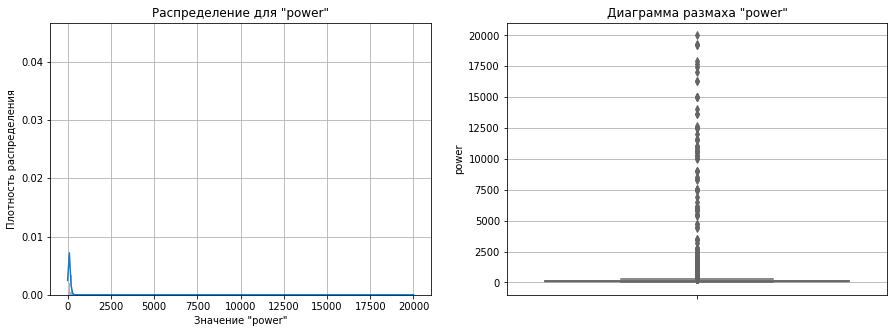

In [52]:
creator_histogram_and_boxplot(new_autos_data, 'power')

In [53]:
new_autos_data['power'].describe()

count    307105.000000
mean        114.106208
std         182.624779
min           0.000000
25%          75.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: power, dtype: float64

В данных присутствуют машины с 0 л.c и 20000 л.с. min - 0, median - 105, max - 20000.

In [54]:
new_autos_data['power'].quantile([0.05, 0.95])

0.05      0.0
0.95    220.0
Name: power, dtype: float64

Исключим автомобили с мощностью менее 20 л.с.

In [ ]:
#new_autos_data = new_autos_data.query('20 <= power <= 220')

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Не согласен с удалением данных, используя верхнюю границу. Разве мощность машины в 250, 300 л.с. являются неадекватными? Это ценные наблюдения, которые мы можем потерять
</div>


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Изменил диапасоз с 20 до 1000, так как на специализированных сайтах дана информация, что за 1000 л.с. единичные случаи и в основном с модифицированными двигателями.</font>
</div>

In [55]:
new_autos_data = new_autos_data.query('20 <= power <= 1000')

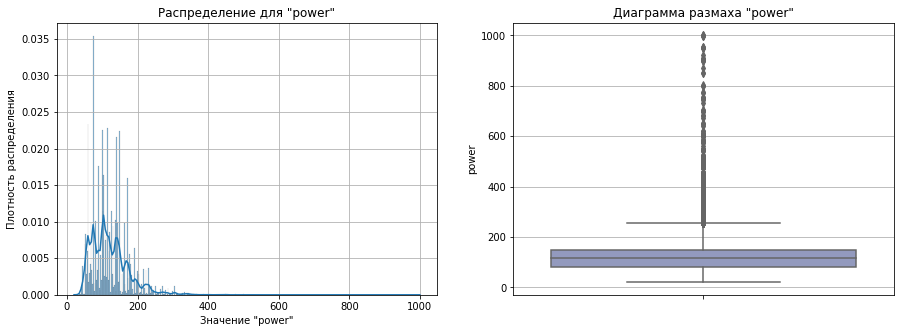

In [56]:
creator_histogram_and_boxplot(new_autos_data, 'power')

In [57]:
new_autos_data['power'].describe()

count    279119.000000
mean        121.974402
std          54.367327
min          20.000000
25%          80.000000
50%         115.000000
75%         150.000000
max        1000.000000
Name: power, dtype: float64

**kilometer**

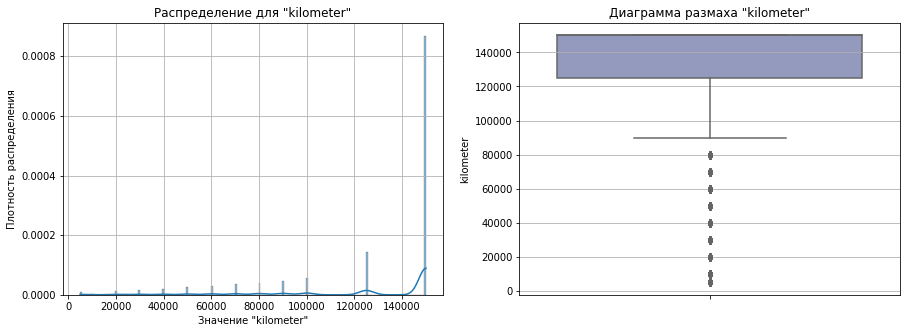

In [58]:
creator_histogram_and_boxplot(new_autos_data, 'kilometer')

In [59]:
new_autos_data['kilometer'].describe()

count    279119.000000
mean     128454.512233
std       36416.778045
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

In [ ]:
#new_autos_data['kilometer'].quantile([0.05, 0.95])

In [ ]:
#new_autos_data = new_autos_data.query('40000 <= kilometer <= 150000')

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> А здесь зачем удалять авто с маленьким пробегом?
</div>


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Невнимательно проанализировал данную информацию, видимо сделал на автомате как и с предыдущими данными.</font>
</div>

In [ ]:
#creator_histogram_and_boxplot(new_autos_data, 'kilometer')

In [ ]:
#new_autos_data['kilometer'].describe()

**Категориальные признаки**

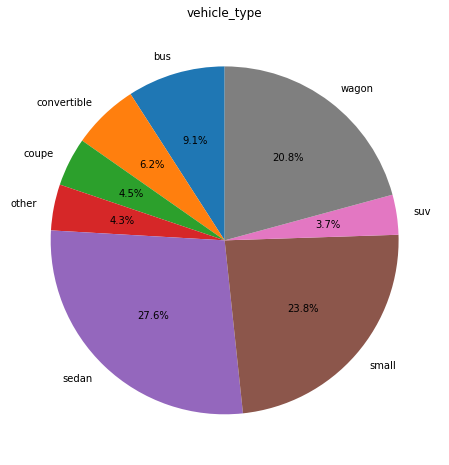

vehicle_type
sedan          77017
small          66525
wagon          57980
bus            25398
convertible    17250
coupe          12641
other          11944
suv            10364
Name: price, dtype: int64

Соотношение максимальной группы к минимальной: 7.431204168274798


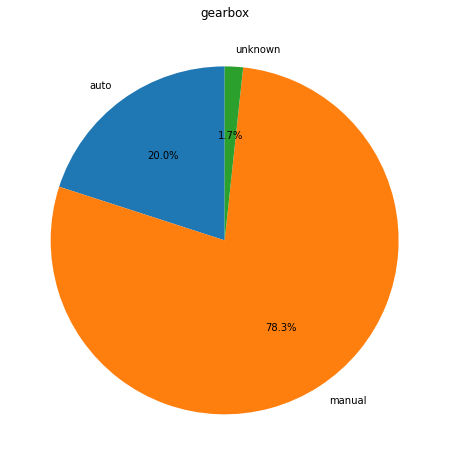

gearbox
manual     218521
auto        55857
unknown      4741
Name: price, dtype: int64

Соотношение максимальной группы к минимальной: 46.091752794769036


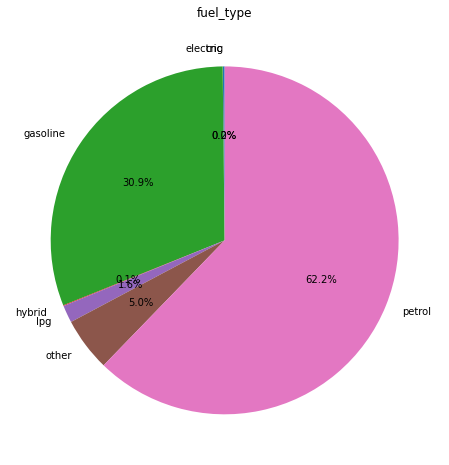

fuel_type
petrol      173743
gasoline     86268
other        13905
lpg           4488
cng            473
hybrid         201
electric        41
Name: price, dtype: int64

Соотношение максимальной группы к минимальной: 4237.634146341464


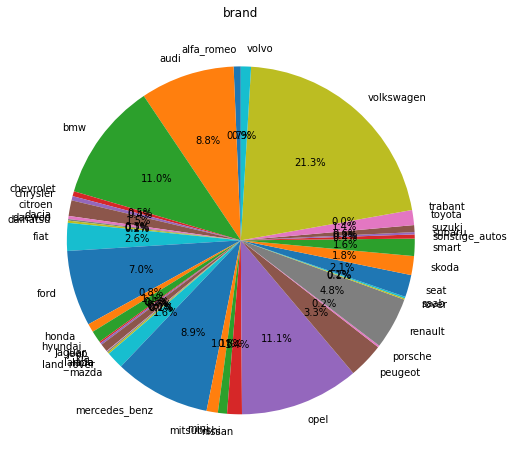

brand
volkswagen        59345
opel              30923
bmw               30789
mercedes_benz     24937
audi              24442
ford              19631
renault           13436
peugeot            9188
fiat               7214
seat               5753
skoda              4906
mazda              4497
smart              4478
citroen            4051
toyota             3886
nissan             3831
hyundai            3084
mini               2933
volvo              2631
mitsubishi         2358
honda              2215
kia                2077
alfa_romeo         1851
suzuki             1795
chevrolet          1279
chrysler           1106
sonstige_autos     1067
dacia               798
subaru              598
daihatsu            579
jeep                501
porsche             476
land_rover          424
saab                424
jaguar              397
daewoo              395
rover               345
lancia              340
lada                132
trabant               7
Name: price, dtype: int64

Соотнош

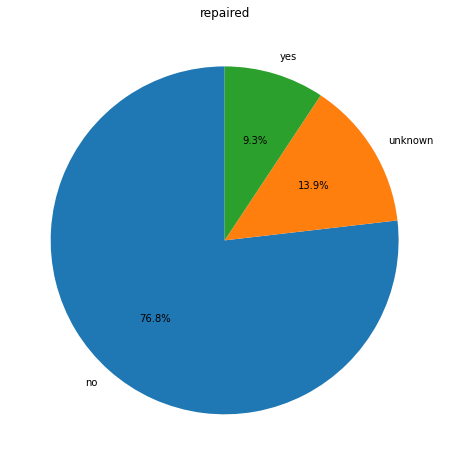

repaired
no         214443
unknown     38690
yes         25986
Name: price, dtype: int64

Соотношение максимальной группы к минимальной: 8.25225121219118


In [60]:
cat_cols = ['vehicle_type', 'gearbox', 'model','fuel_type', 'brand', 'repaired']

for col in cat_cols:
    if col == 'model': continue
    plt.figure(figsize=(10, 8))
    data_tmp = new_autos_data.pivot_table(index = col, values = 'price', aggfunc = 'count')
    plt.pie(data_tmp['price'], labels = data_tmp.index, autopct = '%1.1f%%', startangle = 90)
    plt.title(col)
    plt.show()
    print(data_tmp['price'].sort_values(ascending = False))
    print()
    print(f"Соотношение максимальной группы к минимальной: {data_tmp['price'].max() / data_tmp['price'].min()}")

<div class="alert alert-block alert-info">
<b>Совет: </b> Круговая диаграма для большого количества значений - не лучшее решение
</div>

Взглянув на диаграммы категориальных признаков, можно сказать следующее:

- `vehicle_type`:
    больше всего машин с кузовом sedan, small и wagon, меньше всего suv
- `gearbox`:
    большая часть машин имеет ручную коробку передач, остальные машины - автомат
- `fuel_type`:
    61.8% машин имеют тип топлива petrol, 31.5% gasoline
- `brand`:
    среди всех марок машин явным лидеров является volkswagen, opel, bmw и audi
- `repaired`:
    76.6% машин не были в ремонте

**Вывод:**

- `price`:
    *имеет ненормальное, смещенное влево распределение, так как дорогих машин явно меньше, чем машин подешевле, потому дорогие машины показываются как выбросы на диаграмме размаха. Машина за 0 евро вызывает подозрения, данное значение рассмотрим отдельно. Однако стоит убрать записи с нулевой ценой, поскольку они не представляют интереса в построении модели для предсказания цены - будут только "сбивать" её.*

- `registration_year`:
    *здесь отчетливо видно, что большинство машин были зарегестрированы в начале 2000-ых, выбросами являются очень старые машины.*
    min - 1993, median - 2003, max - 2016

- `power`:
    *имеет практически нормальное, смещенное влево распределение.*
    min - 20, median - 109 , max - 220

- `kilometer`:
    *похоже на распределение Пуассона, вполне логично ожидать большое количество поддержаных машин с большим значением пробега.*
    min - 5000 km, median - 150000 km, max - 150000 km


*Взглянув на диаграммы категориальных признаков, можно сказать следующее:*

- `vehicle_type`:
    больше всего машин с кузовом sedan, small и wagon, меньше всего suv
- `gearbox`:
    большая часть машин имеет ручную коробку передач, остальные машины - автомат
- `fuel_type`:
    61.8% машин имеют тип топлива petrol, 31.5% gasoline
- `brand`:
    среди всех марок машин явным лидеров является volkswagen, opel, bmw и audi
- `repaired`:
    76.6% машин не были в ремонте



<div class="alert alert-block alert-success">
<b>Успех:</b> В целом неплохая, детальная предобработка, хоть и не без ошибок. Идем дальше
</div>

<div class="alert alert-block alert-info">
<b>Совет:</b> 

 Советую обратить внимание на библиотеки sweetviz и ydata_profiling помогут в проведении более тщательного EDA анализа. Я использую их в своей работе для первичного осмотра данных, но это можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям. 
    
Очень просты в использоовании, на вход кладется датафрейм: ydata_profiling.ProfileReport(df) 
</div>

## Корреляционный анализ

Поскольку количественные признаки распределены ненормально и в таблице имеются категориальные признаки для корреляционного анализа будем использовать корреляционную матрицу библиотеки phik.

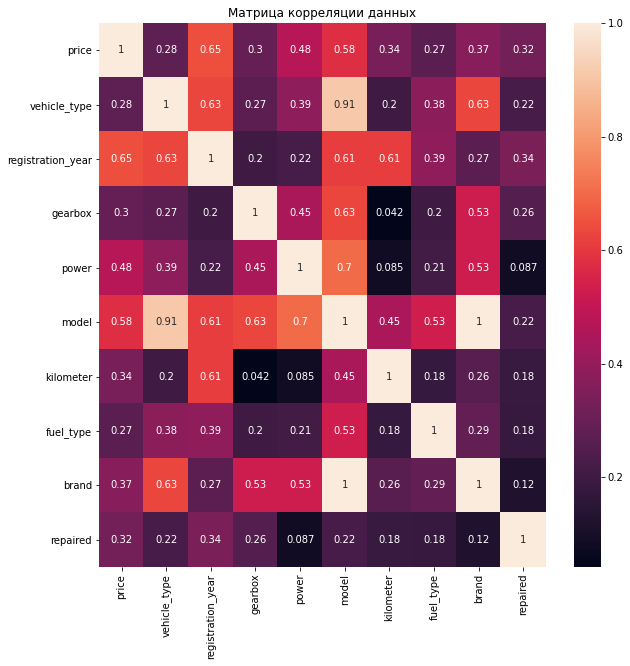

In [61]:
corr_matrix = \
new_autos_data.phik_matrix(interval_cols=['price', 'power'])

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)
plt.title('Матрица корреляции данных')
plt.show()

**Вывод:**

Наблюдается мультикорреляцию между `model` и `vehicle_type`, `model` и `brand`. С целевым признаком больше всего коррелируют `model`, `registration_year`, `power`, `repaired`. Что в целом логично. Поскольку для обучения будут использоваться модели на основе деревьев, такая мультиколлениарность нам не страшна;
целевой признак цены имеет небольшие корреляции со всеми признаками в таблице.

<div class="alert alert-block alert-success">
<b>Успех:</b> Лайк за phik - интервальные колонки корректно переданы
</div>

## Обучение моделей

**Подготовка выборки для обучения модели**

In [62]:
RAND_STATE = 42
TEST_SIZE = 0.25

In [63]:
# создадим тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    new_autos_data.drop(['price'], axis=1),
    new_autos_data['price'],
    test_size=TEST_SIZE,
    random_state=RAND_STATE
)

In [64]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((209339, 9), (209339,), (69780, 9), (69780,))

In [65]:
# количественный и категориальные датасеты
num_col = ['registration_year', 'power', 'kilometer']
ord_col = ['vehicle_type',
           'gearbox',
           'fuel_type',
           'repaired',
           'brand',
           'model']

In [66]:
#Pipeline для кодирования категориальных признаков
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder( handle_unknown='use_encoded_value', unknown_value=np.nan)),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# Pipeline для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ord', ord_pipe, ord_col),
        ('num', StandardScaler(), num_col)
    ], 
    remainder='passthrough'
)

# Итоговый Pipeline: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RAND_STATE))
])


**Обучение дерева решений для задач регрессии**

In [67]:
#Параметры для передачи RandomizedSearchCV для поиска оптимальной модели 
#с разными Scaler и перебором гиперпараметров
param_distributions_tree = [
    {
        'models': [DecisionTreeRegressor(random_state=RAND_STATE)],
        'models__max_depth': range(2, 21),
        'preprocessor__num': [StandardScaler(), 'passthrough']  
    }]


#поиск оптимальной модели с перебором гиперпараметров
rand_tree = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_distributions_tree, 
    cv=5, 
    scoring='neg_root_mean_squared_error', 
    n_jobs=-1, 
)

#обучение модели на тренировочной выборке
tic = time.time()
rand_tree.fit(X_train, y_train)
toc = time.time()
time_tree_train = toc - tic 

print('Время нахождения лучшей модели:\n', round(time_tree_train, 2), 'сек')
print('Метрика RMSE для лучшей модели:\n', round(-rand_tree.best_score_, 2), 'евро') 
print('\nЛучшая модель и её параметры:\n\n', rand_tree.best_params_) 

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.

Время нахождения лучшей модели:
 46.83 сек
Метрика RMSE для лучшей модели:
 1757.42 евро

Лучшая модель и её параметры:

 {'preprocessor__num': StandardScaler(), 'models__max_depth': 16, 'models': DecisionTreeRegressor(max_depth=16, random_state=42)}


In [68]:
start = time.time()
rand_tree.best_estimator_.fit(X_train, y_train)
end = time.time()
time_tree_train = end - start 
print('Время обучения:\n', round(time_tree_train, 2), 'сек')

start = time.time()
pred_tree = rand_tree.best_estimator_.predict(X_train)
end = time.time()
time_tree_pred = end - start 
print('Время предсказания:\n', round(time_tree_pred, 2), 'сек')

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


Время обучения:
 1.12 сек
Время предсказания:
 0.39 сек


**Обучение CatBoostRegressor**

In [69]:
#Параметры для передачи RandomizedSearchCV для поиска оптимальной модели 
#с разными Scaler и перебором гиперпараметров

param_distributions_catboost = [    
    {
        'models': [CatBoostRegressor(random_state=RAND_STATE, 
                                     verbose=False, 
                                     learning_rate=0.1)],
        'models__max_depth': range(2, 5),
        'preprocessor__num': ['passthrough'] 
    }
]

#поиск оптимальной модели с перебором гиперпараметров

rand_catboost = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_distributions_catboost, 
    cv=5, 
    scoring='neg_root_mean_squared_error', 
    n_jobs=-1
)

#обучение модели на тренировочной выборке

tic = time.time()
rand_catboost.fit(X_train, y_train)
toc = time.time()
time_catboost_train = toc - tic 

print('Время нахождения лучшей модели:\n', round(time_catboost_train, 2), 'сек')
print('Метрика RMSE для лучшей модели:\n', round(-rand_catboost.best_score_, 2), 'евро') 
print('\nЛучшая модель и её параметры:\n\n', rand_catboost.best_params_) 



/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: 

Время нахождения лучшей модели:
 319.53 сек
Метрика RMSE для лучшей модели:
 1563.56 евро

Лучшая модель и её параметры:

 {'preprocessor__num': 'passthrough', 'models__max_depth': 4, 'models': <catboost.core.CatBoostRegressor object at 0x7f4cc00e9250>}


In [70]:
start = time.time()
rand_catboost.best_estimator_.fit(X_train, y_train)
end = time.time()
time_catboost_train = end - start
print('Время обучения:\n', round(time_catboost_train, 2), 'сек')

start = time.time()
pred_catboost = rand_tree.best_estimator_.predict(X_train)
end = time.time()
time_catboost_pred = end - start 
print('Время предсказания:\n', round(time_catboost_pred, 2), 'сек')


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


Время обучения:
 25.97 сек
Время предсказания:
 0.38 сек


**Обучение LGBMRegressor**

In [71]:
#Параметры для передачи RandomizedSearchCV для поиска оптимальной модели 
#с разными Scaler и перебором гиперпараметров
param_distributions_lgbm = [    
    {
        'models': [LGBMRegressor(random_state=RAND_STATE)],
        'models__max_depth': range(2, 5),
        'models__min_samples_leaf': range(4, 6),
        'preprocessor__num': ['passthrough'] 
    }
]

#поиск оптимальной модели с перебором гиперпараметров
rand_lgbm = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_distributions_lgbm, 
    cv=5, 
    scoring='neg_root_mean_squared_error', 
    n_jobs=-1
)

#обучение модели на тренировочной выборке

tic = time.time()
rand_lgbm.fit(X_train, y_train)
toc = time.time()
time_lgbm_train = toc - tic 
print('Время нахождения лучшей модели:\n', round(time_lgbm_train, 2), 'сек')
print('Метрика RMSE для лучшей модели:\n', round(-rand_lgbm.best_score_, 2), 'евро') 
print('\nЛучшая модель и её параметры:\n\n', rand_lgbm.best_params_)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
Время нахождения лучшей модели:
 97.64 сек
Метрика RMSE для лучшей модели:
 1711.28 евро

Лучшая модель и её параметры:

 {'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 5, 'models__max_depth': 4, 'models': LGBMRegressor(max_depth=4, min_samples_leaf=5, random_state=42)}


In [72]:
tic = time.time()
rand_lgbm.best_estimator_.fit(X_train, y_train)
toc = time.time()
time_lgbm_train = toc - tic 
print('Время обучения:\n', round(time_lgbm_train, 2), 'сек')

tic = time.time()
pred_lgbm = rand_lgbm.best_estimator_.predict(X_train)
toc = time.time()
time_lgbm_pred = toc - tic 
print('Время предсказания:\n', round(time_lgbm_pred, 2), 'сек')

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


Время обучения:
 3.6 сек
Время предсказания:
 1.61 сек


**Вывод:**

Обучены 3 модели:
  - DecisionTreeRegressor:
    - Время нахождения лучшей модели: 46.83 сек
    - Метрика RMSE для лучшей модели: 1757.42 евро
    - Лучшая модель и её параметры: {'preprocessor__num': StandardScaler(), 'models__max_depth': 16, 'models': DecisionTreeRegressor(max_depth=16, random_state=42)}
    - Время обучения: 0.87 сек
    - Время предсказания: 0.29 сек
    
  - CatBoostRegressor:
     - Время нахождения лучшей модели: 251.69 сек
     - Метрика RMSE для лучшей модели: 1563.56 евро
     - Лучшая модель и её параметры: {'preprocessor__num': 'passthrough', 'models__max_depth': 4, 'models': <catboost.core.CatBoostRegressor object at 0x7fcf4fd9a0d0>}
     - Время обучения: 20.45 сек
     - Время предсказания: 0.29 сек
     
     
  - LGBMRegressor:
     - Время нахождения лучшей модели: 81.59 сек
     - Метрика RMSE для лучшей модели: 1711.28 евро
     - Лучшая модель и её параметры: {'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 5, 'models__max_depth': 4, 'models': LGBMRegressor(max_depth=4, min_samples_leaf=5, random_state=42)}
     - Время обучения: 2.8 сек
     - Время предсказания: 1.3 сек


<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично проделан шаг
    
- Радует количество рассмотренных моделей.   
- Кросс-валидационные методы успешно использованы. 
- Все метрики интересующие заказчика корректно вычислены 
</div>




## Анализ моделей

In [73]:
data = {'RMSE_train':[round(-rand_tree.best_score_, 2),
                      round(-rand_catboost.best_score_, 2), 
                      round(-rand_lgbm.best_score_, 2)],
        'training_time, s':[round(time_tree_train, 2),
                              round(time_catboost_train, 2), 
                              round(time_lgbm_train, 2)], 
        'prediction_time, s':[round(time_tree_pred, 2), 
                              round(time_catboost_pred, 2), 
                              round(time_lgbm_pred, 2)]
       } 
 
df_model_analysis = pd.DataFrame(data, index =['DecisionTreeRegressor', 'CatBoostRegressor', 'LGBMRegressor']) 
 
df_model_analysis

,RMSE_train,"training_time, s","prediction_time, s"
DecisionTreeRegressor,1757.42,1.12,0.39
CatBoostRegressor,1563.56,25.97,0.38
LGBMRegressor,1711.28,3.60,1.61


In [74]:
#метрика на тестовой выборке
y_pred = rand_tree.best_estimator_.predict(X_test)

print('Метрика RMSE для лучшей модели на тестовой выборке:\n', 
      round(mean_squared_error(y_test, y_pred, squared=False), 2), 
      'евро')

Метрика RMSE для лучшей модели на тестовой выборке:
 1708.6 евро


**Вывод:**


- По значениям метрик все модели удовлетворяют условиям заказчика - RMSE < 2500. Наименьшая метрика получается при использовании CatBoostRegressor.
- По времени обучения и предсказания самой быстрой оказалось самая простая из представленных моделей - дерево решений.
- По совокупности факторов можно рекомендовать модель дерево решений - несмотря на то, что у нее не самая низкая метрика, но при этом она обучается намнго быстрее, чем другие модели. Да и метрика соответствует условиям заказчика.
- На тестовой выборке лучшая модель показывает нужное значение метрики.


<div class="alert alert-block alert-success">
<b>Успех:</b> Выбор лучшей модели обоснован. На тестовой выборке получено хорошее качество!
</div>

## Общий вывод

- данные сервиса по продаже автомобилей с пробегом загрузили и изучили 

- обнаруженны и обработаны пропуски: `vehicle_type`, `gearbox`, `model`, `fuel_type`,`repaired`

- преобразованы и обработаны типы данных:`date_crawled`,`date_created`, `last_seen`, `registration_year`, `registration_month`

- обнаружены и устранены дубликаты

- обнаружены и обработаны аномальные значения в данных 

- избавились от неинформативных признаков, которые не повлияют на обучение модели для определения стоимости автомобиля:`date_crawled`, `registration_month`, `date_created`, `number_of_pictures`, `postal_code`, `last_seen`

- далее на подготовленных данных были обучени 3 модели регрессии:  `DecisionTreeRegressor`, `LGBMRegressor` и `CatBoostRegressor`. Для каждой была оценена метрика `RMSE`. Все модели показали хорошое значение метрики, которое попадало под условия заказчика - `RMSE` < *2500*. Также была оценена время обучения и предсказания моделей.

- наиболее оптимальной по времени и значению можно считать модель CatBoostRegressor

**Поэтому заказчику я рекомендую модель дерево решений - несмотря на то, что у нее не самая низкая метрика, но при этом она обучается намнго быстрее, чем другие модели. Да и метрика соответствует условиям заказчика:**

 - *Лучшая модель и её параметры: {'preprocessor__num': StandardScaler(), 'models__max_depth': 16, 'models': DecisionTreeRegressor(max_depth=16, random_state=42)}*
 - *Метрика RMSE для лучшей модели: 1757.42*
 - *Метрика RMSE для лучшей модели на тестовой выборке:1708.6*


<div class="alert alert-block alert-success">
<b>Успех:</b> Всегда приятно наблюдать подробный и структурированный итоговый вывод в конце работы!
</div>


<div class="alert alert-block alert-info">
<b>Совет:</b> 

Также если говорить, что можно ещё улучшить в подобных проектах, то я бы выделил такие моменты:<br>
    
1) Для понимания, а какие в итоге факторы важны при моделировании, можно выводить их важность, использую feature_importances_, ну и график заодно. Это будет смотреться очнь здорово: результативная метрика и график важности факторов)))
    
2) У нас разный возраст машин. Есть гипотеза, что для разных возрастов - своё ценообразование. Поэтому, можно попробовать ввести фактор "тип возраста" (ретро, супер-ретро, старая, новая... надо подумать..)..<br>

3) У некоторых моделей семейства бустингов, есть внутренний метод кодировки данных, который хорошо было бы попробовать
</div>

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей